In [4]:
import pandas as pd
import pickle
pd.set_option("display.max_columns", None)
from collections import Counter
import re

In [5]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library
import sddk

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
mops_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [6]:
jstor_df = pd.read_feather("../data/large_files/jstor_df_v1.feather")

In [7]:
unigramCount_dict = pickle.load(open("../data/large_files/unigramCount_cleaned_dict.pickle", "rb"))

In [8]:
# testing
sorted(list(unigramCount_dict.items())[0][1].items(), key=lambda kv: kv[1], reverse=True)[:50]

[('', 4305),
 ('have', 64),
 ('God', 50),
 ('man', 49),
 ('do', 33),
 ('life', 31),
 ('Jesus', 28),
 ('say', 21),
 ('know', 21),
 ('way', 21),
 ('live', 20),
 ('see', 18),
 ('ask', 17),
 ('thing', 17),
 ('question', 16),
 ('go', 16),
 ('day', 16),
 ('love', 16),
 ('come', 15),
 ('world', 15),
 ('truth', 14),
 ('silence', 14),
 ('forgive', 14),
 ('time', 13),
 ('make', 13),
 ('evil', 12),
 ('good', 12),
 ('own', 12),
 ('need', 12),
 ('Lord', 12),
 ('take', 11),
 ('face', 11),
 ('mean', 11),
 ('look', 11),
 ('great', 11),
 ('Sermon', 11),
 ('new', 10),
 ('view', 10),
 ('call', 10),
 ('work', 10),
 ('year', 10),
 ('faith', 10),
 ('human', 10),
 ('omnipotence', 10),
 ('such', 10),
 ('be', 10),
 ('power', 9),
 ('foot', 9),
 ('word', 9),
 ('war', 9)]

# Generate overall vocabularies

In [15]:
unigrams_merged = merge_data_from_ids(jstor_df["id"].tolist(), unigramCount_dict)

In [16]:
len(unigrams_merged)

1349919

In [17]:
sorted(list(unigrams_merged.items()), key=lambda kv: kv[1], reverse=True)[:100]

[('', 77692094),
 ('have', 1104349),
 ('God', 497732),
 ('do', 464566),
 ('Paul', 407736),
 ('see', 373526),
 ('church', 343553),
 ('christian', 314391),
 ('other', 294611),
 ('new', 286333),
 ('Jesus', 281420),
 ('Christ', 265818),
 ('make', 234459),
 ('say', 230593),
 ('be', 222501),
 ('work', 208323),
 ('man', 194236),
 ('use', 190619),
 ('time', 187964),
 ('such', 186489),
 ('life', 183670),
 ('book', 178837),
 ('text', 174671),
 ('give', 172554),
 ('come', 168062),
 ('way', 164861),
 ('word', 162341),
 ('world', 158617),
 ('people', 153967),
 ('take', 152191),
 ('study', 147156),
 ('mean', 142168),
 ('John', 142009),
 ('write', 136283),
 ('own', 135050),
 ('gospel', 134077),
 ('faith', 133583),
 ('find', 131424),
 ('call', 130498),
 ('letter', 130494),
 ('many', 130423),
 ('know', 130290),
 ('p', 129411),
 ('law', 128282),
 ('jewish', 123868),
 ('become', 123334),
 ('history', 123315),
 ('most', 123221),
 ('understand', 114747),
 ('good', 114367),
 ('place', 113986),
 ('human', 11

In [19]:
sorted(list([tup for tup in unigrams_merged.items() if len(tup[0].split()) > 1]), key=lambda kv: kv[1], reverse=True)[:100]


[('Greco roman', 7603),
 ('century first', 4488),
 ('Acts Luke', 4285),
 ('Christian jewish', 2894),
 ('d i', 2365),
 ('century nineteenth', 2281),
 ('critical historical', 2131),
 ('Graeco Roman', 1919),
 ('century second', 1901),
 ('century twentieth', 1861),
 ('century fourth', 1819),
 ('Saxon anglo', 1710),
 ('giving life', 1502),
 ('day latter', 1408),
 ('century sixteenth', 1348),
 ('day present', 1324),
 ('self understanding', 1319),
 ('century seventeenth', 1271),
 ('day seventh', 1201),
 ('Luke act', 1189),
 ('old year', 1125),
 ('Murphy Oconnor', 1101),
 ('Paul s', 1007),
 ('control self', 964),
 ('sacrifice self', 951),
 ('century eighteenth', 949),
 ('giving self', 937),
 ('scientific social', 925),
 ('divine human', 899),
 ('same sex', 890),
 ('long term', 887),
 ('Engberg Pedersen', 875),
 ('Greek speak', 869),
 ('God give', 855),
 ('Denis Saint', 815),
 ('end time', 800),
 ('evident self', 789),
 ('century fifth', 758),
 ('century third', 750),
 ('Judeo christian', 737),

In [20]:
unigram = "ὑμῖν"
unigram = re.sub(r'[^\x00-\x7f]',r'', unigram)
unigram

''

In [26]:
collocation_replacements = {
    "Greco Roman" : "Greco_Roman",
    "Graeco Roman" : "Greco_Roman",
    "Acts Luke" : "Luke_Acts",
    "Luke act" : "Luke_Acts",
    "Christian Jewish" : "Jewish_Christian",
    "Judeo Christian" : "Jewish_Christian",
    "Judaeo Christian" : "Jewish_Christian",
    "Paul s" : "Paul",
    "Denis Saint" : "Saint_Denis",
    "Pauline deutero" : "deutero_Pauline",
    "Deutero Pauline" : "deutero_Pauline",
    "Saxon anglo" : "Anglo_Saxon",
    "Murphy Oconnor" : "Murphy_Oconnor",
    "Engberg Pedersen" : "Engberg_Pedersen"
}
collocations_keys = list(collocation_replacements.keys())

In [27]:
to_replace ={
    "Century" : "century",
    "christian": "Christian",
    "Biblical": "biblical",
    "Church": "church",
    "Faith": "faith",
    "Apostle": "apostle",
    "american": "American",
    "jewish": "Jewish",
    "roman" : "Roman",
    "testament": "Testament",
    "Lord": "lord"
}
to_replace_keys = list(to_replace.keys())

In [28]:
len(unigrams_merged)

1349919

In [36]:
%%time
unigrams_merged_cleaned = Counter()
for unigram, count in unigrams_merged.items():
    unigram = re.sub(r'[^\x00-\x7f]',r'', unigram)
    if len(unigram.split())==1:
        if  unigram in to_replace_keys:
            unigram = to_replace[unigram]
    if len(unigram.split())>1:    # if multiword
        for key in to_replace_keys:
            if key in unigram:
                unigram = re.sub(key, to_replace[key], unigram)
        if unigram in collocations_keys:
            unigram = collocation_replacements[unigram]
        #elif "century" in unigram:
        #   unigram = unigram.replace(" ", "_")
    if len(unigram.split())>1:
        multiunigrams_dict = dict([(el , count) for el in unigram.split()])
        unigrams_merged_cleaned.update(multiunigrams_dict)
    else:
        unigrams_merged_cleaned.update({unigram : count})

CPU times: user 2.32 s, sys: 545 ms, total: 2.87 s
Wall time: 4.75 s


In [37]:
len(unigrams_merged_cleaned)

1161886

In [38]:
keys_to_remove = ["", "e", "cf", "p"]
for key in keys_to_remove:
    del unigrams_merged_cleaned[key]

In [39]:
len(unigrams_merged_cleaned)

1161882

In [40]:
sum([tup[1] for tup in unigrams_merged_cleaned.items()])

71944547

In [41]:
pickle.dump(unigrams_merged_cleaned, open("../data/large_files/unigrams_merged_cleaned.pickle", "wb"))

# Explore subsets & decades

In [9]:
# manual test
col = "publicationYear"
matchstring = "==1951"
eval('jstor_df[jstor_df["{0}"]{1}]'.format(col, matchstring))["id"].tolist()

['http://www.jstor.org/stable/1198957',
 'http://www.jstor.org/stable/1508417',
 'ark://27927/phx7f9rxk2',
 'http://www.jstor.org/stable/3261590',
 'http://www.jstor.org/stable/24456097',
 'ark://27927/pgg389199fd',
 'ark://27927/phx61xr9tmg',
 'ark://27927/pgh1g2mt8q5',
 'ark://27927/phx61xrbpxv',
 'ark://27927/phx64dprn08',
 'http://www.jstor.org/stable/43720276',
 'http://www.jstor.org/stable/20516383',
 'http://www.jstor.org/stable/41175585',
 'ark://27927/phx61tbjnvh',
 'http://www.jstor.org/stable/1198933',
 'http://www.jstor.org/stable/1456587',
 'http://www.jstor.org/stable/43720275',
 'http://www.jstor.org/stable/44210186',
 'ark://27927/phx622zp8bt',
 'http://www.jstor.org/stable/1197811',
 'ark://27927/pgh1h1tfc4p',
 'http://www.jstor.org/stable/42621087',
 'ark://27927/phx61tbjqw3',
 'ark://27927/phx64dprn74',
 'ark://27927/pgh1h00bn1j',
 'ark://27927/pgh1g2mt8xg',
 'ark://27927/phx6bfsx4f4',
 'http://www.jstor.org/stable/1198956',
 'http://www.jstor.org/stable/3262039',
 '

In [10]:
def ids_from_colvals(df_name, col, matchstring):
    ids = eval('{0}[{0}["{1}"]{2}]'.format(df_name, col, matchstring))["id"].tolist()
    return ids

In [11]:
# test with function...
len(ids_from_colvals("jstor_df", "publicationYear", ".between(1920, 1929)"))

132

In [12]:
def merge_data_from_ids(ids, datadict):
    c = Counter()
    for id in ids:
        d = datadict[id]
        c.update(d)
    return c

In [13]:
def get_tops(df_name, col, matchstring, n=10):
    ids = ids_from_colvals(df_name, col, matchstring)
    c = merge_data_from_ids(ids, unigramCount_dict)
    c_tups = [el for el in c.items() if el[0] != ""]
    top10 = sorted(c_tups, key=lambda kv: kv[1], reverse=True)[:n]
    return top10

In [11]:
decades = []
for decade_n in range(0,10):
    decades.append("19{0}0,19{0}9".format(str(decade_n)))
decades += ["2000,2009", "2010,2019"]
decades

['1900,1909',
 '1910,1919',
 '1920,1929',
 '1930,1939',
 '1940,1949',
 '1950,1959',
 '1960,1969',
 '1970,1979',
 '1980,1989',
 '1990,1999',
 '2000,2009',
 '2010,2019']

In [12]:
def pct_frequency(df_name, col, matchstring, wordlist):
    ids = ids_from_colvals(df_name, col, matchstring)
    jstor_df_subset = eval('{0}[{0}["id"].isin(ids)]'.format(df_name))
    totalwords = jstor_df_subset["wordCount"].sum()
    c = merge_data_from_ids(ids, unigramCount_dict)
    wordlist_data = {}
    for word in wordlist:
        word_pct_frequency = (c[word] / totalwords) * 100
        wordlist_data[word] = word_pct_frequency
    return wordlist_data

In [14]:
data = []
for decade in decades:
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_df", "publicationYear", ".between({0})".format(decade), ["God", "Paul", "Jesus", "Christ"]))
    data.append(decade_data)

In [15]:
pd.DataFrame(data)

,decade,God,Paul,Jesus,Christ
0,"1900,1909",0.204684,0.188859,0.208261,0.184938
1,"1910,1919",0.263048,0.180314,0.238695,0.139280
2,"1920,1929",0.139414,0.156997,0.093256,0.091896
3,"1930,1939",0.253791,0.104859,0.123861,0.135302
4,"1940,1949",0.369197,0.237859,0.175342,0.229071
5,"1950,1959",0.360366,0.252268,0.167151,0.234572
6,"1960,1969",0.368954,0.249019,0.162933,0.241616
7,"1970,1979",0.338972,0.267827,0.150324,0.208015
8,"1980,1989",0.368815,0.331902,0.172326,0.205690
9,"1990,1999",0.302153,0.314132,0.154758,0.158038


In [16]:
words = ["social", "gender", "Sanders"]
data = []
for decade in decades:
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_df", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

,decade,social,gender,Sanders
0,"1900,1909",0.017476,0.000413,0.000894
1,"1910,1919",0.038615,0.000584,0.000500
2,"1920,1929",0.045006,0.000000,0.002721
3,"1930,1939",0.028453,0.000099,0.000895
4,"1940,1949",0.026965,0.000134,0.000604
5,"1950,1959",0.021580,0.000160,0.000681
6,"1960,1969",0.026682,0.000296,0.000888
7,"1970,1979",0.033453,0.000979,0.003241
8,"1980,1989",0.050332,0.001135,0.009631
9,"1990,1999",0.060790,0.009570,0.005950


[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999'),
 Text(10, 0, '2000,2009'),
 Text(11, 0, '2010,2019')]

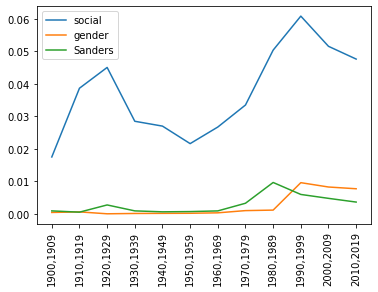

In [17]:
ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999'),
 Text(10, 0, '2000,2009'),
 Text(11, 0, '2010,2019')]

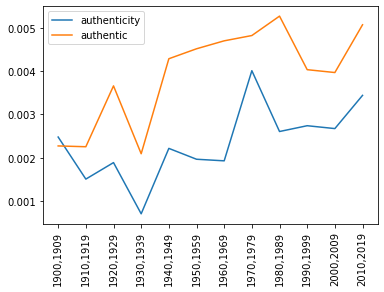

In [18]:
words = ["authenticity", "authentic"]
data = []
for decade in decades:
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_df", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

In [19]:
jstor_articles = jstor_df[jstor_df["docType"]=="article"]
len(jstor_articles)

9560

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999'),
 Text(10, 0, '2000,2009'),
 Text(11, 0, '2010,2019')]

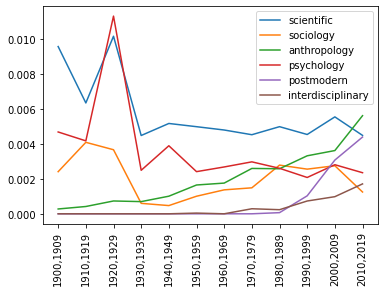

In [20]:
words = ["scientific", "sociology", "anthropology", "psychology", "postmodern", "interdisciplinary"]
data = []
for decade in decades:
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

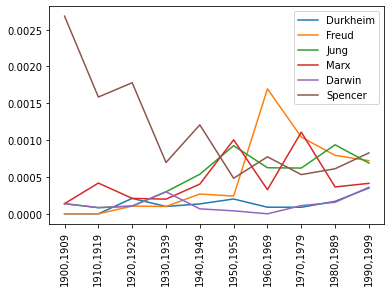

In [21]:
words = ["Durkheim", "Freud", "Jung", "Marx", "Darwin", "Spencer"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

# Exploring interest in science in the 20s

In [22]:
# test with function...
ids = ids_from_colvals("jstor_df", "publicationYear", ".between(1920, 1929)")
jstor_1920 = jstor_df[jstor_df["id"].isin(ids)]
jstor_1920.head(20)

,creator,datePublished,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sequence,tdmCategory,title,url,volumeNumber,wordCount,docSubType,sourceCategory,subTitle,hasPartTitle
72,[Anna Benedbtti],1928-10-01,article,10.1111/j.1467-954X.1928.tb01672.x,ark://27927/phx2hv5phb6,"[{'name': 'doi', 'value': '10.1111/j.1467-954X...",Sociological Review,4,"[sicily, palermo, sicilian, island, bentinck, ...",[eng],"[unigram, bigram, trigram]",10.0,309,300,300-309,portico,1928,"John Wiley & Sons, Inc.",4.0,"[Arts - Art history, Religion - Theology]",ABOUT SICILY,http://doi.org/10.1111/j.1467-954X.1928.tb01672.x,a20,4618,None,None,None,None
152,[E. F. Scott],1922-01-01,article,None,http://www.jstor.org/stable/1195100,"[{'name': 'issn', 'value': '00224189'}, {'name...",The Journal of Religion,1,None,[eng],"[unigram, bigram, trigram, fullText]",3.0,101,99,pp. 99-101,jstor,1922,University of Chicago Press,NaN,[Religion - Spiritual belief systems],The Influence of the Apostle Paul on Early Chr...,http://www.jstor.org/stable/1195100,2,1002,book-review,"[Religion, Humanities]",None,None
199,None,1921-07-01,article,None,http://www.jstor.org/stable/528469,"[{'name': 'issn', 'value': '10620516'}, {'name...",The American Journal of Semitic Languages and ...,4,None,[eng],"[unigram, bigram, trigram, fullText]",5.0,241,241,p. 241,jstor,1921,University of Chicago Press,NaN,[Religion - Theology],Front Matter,http://www.jstor.org/stable/528469,37,1571,misc,"[Archaeology, Middle East Studies, Social Scie...",None,None
312,[John V. Madison],1925-01-01,article,None,http://www.jstor.org/stable/3260255,"[{'name': 'issn', 'value': '00219231'}, {'name...",Journal of Biblical Literature,3/4,None,[eng],"[unigram, bigram, trigram, fullText]",28.0,288,261,pp. 261-288,jstor,1925,Society of Biblical Literature,NaN,"[Religion - Theology, Arts - Literature]",English Versions of the New Testament: A Bibli...,http://www.jstor.org/stable/3260255,44,7876,research-article,"[Religion, Humanities]",None,None
521,None,1929-10-01,article,None,http://www.jstor.org/stable/25080246,"[{'name': 'issn', 'value': '00764981'}, {'name...",Proceedings of the Massachusetts Historical So...,None,None,[eng],"[unigram, bigram, trigram]",42.0,230,191,pp. 191-230,jstor,1929,Massachusetts Historical Society,NaN,[Religion - Spiritual belief systems],May Meeting. Gifts to the Society; George Phil...,http://www.jstor.org/stable/25080246,63,16117,research-article,"[American Studies, Area Studies, History, Hist...",None,None
536,[Donald W. Riddle],1929-07-01,article,None,http://www.jstor.org/stable/1196984,"[{'name': 'issn', 'value': '00224189'}, {'name...",The Journal of Religion,3,None,[eng],"[unigram, bigram, trigram]",4.0,471,468,pp. 468-471,jstor,1929,University of Chicago Press,NaN,[Religion - Theology],Recent New Testament Studies in Europe,http://www.jstor.org/stable/1196984,9,1141,book-review,"[Religion, Humanities]",None,None
639,[S. R. I. Zwemer],1920-04-01,article,10.1111/j.1478-1913.1920.tb01798.x,ark://27927/phx2gjfwtvh,"[{'name': 'doi', 'value': '10.1111/j.1478-1913...",The Muslim World,2,"[moslem, mohammed, moslem world, religion, chr...",[eng],"[unigram, bigram, trigram]",13.0,156,144,144-156,portico,1920,"John Wiley & Sons, Inc.",7.0,"[Religion - Spiritual belief systems, Philosop...",Islam‐Its Worth and Its Failure,http://doi.org/10.1111/j.1478-1913.1920.tb01798.x,10,5066,None,None,None,None
686,[S. Z. Batten],1922-05-01,article,None,http://www.jstor.org/stable/1014601,"[{'name': 'issn', 'value': '00027162'}, {'name...",The Annals of the American Academy of Politica...,None,None,[eng],"[unigram, bigram, trigram, fullText]",6.0,152,147,pp. 147-152,jstor,1922,"Sage Publications, Inc.",NaN,[Religion - Theology],The Ethics of the Ministry,http://www.jstor.org/stable/1014601,101,3523,research-article,"[Business & Economics, Economics, Sociology, P...",None,None
792,[Mary E. Byrne],1926-0

In [26]:
#set_with_dataframe(mops_data.add_worksheet("jstor_1920", 1,1), jstor_1920)

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999')]

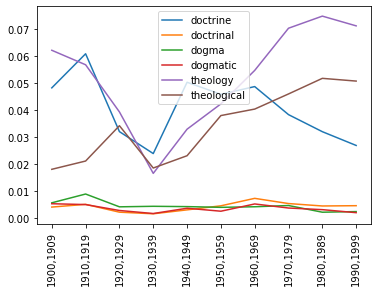

In [24]:
words = ["doctrine", "doctrinal", "dogma", "dogmatic", "theology", "theological"]
data = []
for decade_n in range(0,10):
    decade = "19{0}0,19{0}9".format(str(decade_n))
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)

In [25]:
# test with function...
ids = ids_from_colvals("jstor_df", "publicationYear", ".between(1930, 1939)")
jstor_1930 = jstor_df[jstor_df["id"].isin(ids)]
jstor_1930.head(20)

,creator,datePublished,docType,doi,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sequence,tdmCategory,title,url,volumeNumber,wordCount,docSubType,sourceCategory,subTitle,hasPartTitle
316,[James Moffatt],1936-01-01,article,10.1017/S0017816000033186,ark://27927/pgh1gbbbsx6,"[{'name': 'local_publisher_id', 'value': 'S001...",Harvard Theological Review,1,"[ignatius, presbyters, christ, philad, christi...",[eng],"[unigram, bigram, trigram]",38.0,38,1,1-38,portico,1936,Cambridge University Press,3.0,"[History - Historical methodology, Religion - ...",An Approach to Ignatius,http://doi.org/10.1017/S0017816000033186,29,17552,research-article,None,None,None
335,[J. E. Frame],1930-01-01,article,None,http://www.jstor.org/stable/3259867,"[{'name': 'issn', 'value': '00219231'}, {'name...",Journal of Biblical Literature,1,None,[eng],"[unigram, bigram, trigram]",12.0,12,1,pp. 1-12,jstor,1930,Society of Biblical Literature,NaN,"[Religion - Theology, Religion - Spiritual bel...",Paul's Idea of Deliverance,http://www.jstor.org/stable/3259867,49,4851,research-article,"[Religion, Humanities]",None,None
362,[Maurice Goguel],1930-04-01,article,None,http://www.jstor.org/stable/1507638,"[{'name': 'issn', 'value': '00178160'}, {'name...",The Harvard Theological Review,2,None,[eng],"[unigram, bigram, trigram]",28.0,120,93,pp. 93-120,jstor,1930,Cambridge University Press,NaN,"[History - Historical methodology, Religion - ...",The Problem of Jesus,http://www.jstor.org/stable/1507638,23,11406,research-article,"[Religion, Humanities]",None,None
440,"[John Glenn Blackburn, Professor Gaines S. Dob...",1938-07-01,article,10.1177/003463733803500306,ark://27927/phx64dm3qgz,"[{'name': 'doi', 'value': '10.1177/00346373380...",Review & Expositor: An International Baptist J...,3,"[church, modern church, living christ, souther...",[eng],"[unigram, bigram, trigram]",7.0,334,328,pp. 328-334,portico,1938,SAGE Publications,6.0,"[Religion - Spiritual belief systems, Philosop...",Men and the Modern Church,http://doi.org/10.1177/003463733803500306,35,2161,None,None,None,None
592,[Stephen Khoobyar],1937-10-01,article,10.1111/j.1478-1913.1937.tb00369.x,ark://27927/phx2gjmvsxv,"[{'name': 'doi', 'value': '10.1111/j.1478-1913...",The Muslim World,4,"[moslems, christ, preaching, message, christia...",[eng],"[unigram, bigram, trigram]",11.0,380,370,370-380,portico,1937,"John Wiley & Sons, Inc.",6.0,[Religion - Spiritual belief systems],THE JOY OF PREACHING TO MOSLEMS,http://doi.org/10.1111/j.1478-1913.1937.tb00369.x,27,4133,None,None,None,None
856,[John W. Moran],1935-01-01,article,10.5840/thought193510240,ark://27927/pgg388w11zg,"[{'name': 'doi', 'value': '10.5840/thought1935...",Thought: Fordham University Quarterly,2,None,[eng],"[unigram, bigram, trigram]",12.0,265,254,254-265,portico,1935,Philosophy Documentation Center,5.0,[Religion - Spiritual belief systems],The Eucharistie Sacrifice in Ancient Corinth,http://doi.org/10.5840/thought193510240,10,4471,article,None,None,None
865,[A. G. Russell],1937-05-01,article,10.1017/S0017383500004861,ark://27927/pgj2z1b5q3,"[{'name': 'local_publisher_id', 'value': 'S001...",Greece & Rome,18,"[christians, roman empire, worship, emperor, j...",[eng],"[unigram, bigram, trigram]",9.0,178,170,170-178,portico,1937,Cambridge University Press,7.0,"[Religion - Theology, Religion - Spiritual bel...","The Jews, The Roman Empire, and Christianity, ...",http://doi.org/10.1017/S0017383500004861,6,4161,research-article,None,None,None
955,None,1931-10-01,article,None,http://www.jstor.org/stable/1195926,"[{'name': 'issn', 'value': '00224189'}, {'name...",The Journal of Religion,4,None,[eng],"[unigram, bigram, trigram]",6.0,None,None,None,jstor,1931,University of Chicago Press,NaN,[Religion - Spiritual belief systems],Front Matter,http://www.jstor.org/stable/1195926,11,1572,misc,"[Religion, Humanities]",None,None
974,"[C. A. Harper, Isaac Baker, J. W. Fell, Davi

In [ ]:
#set_with_dataframe(mops_data.add_worksheet("jstor_1930", 1,1), jstor_1930)

In [ ]:
jstor_df[jstor_df["isPartOf"]=="The Muslim World"]["title"]

[Text(0, 0, '1900,1909'),
 Text(1, 0, '1910,1919'),
 Text(2, 0, '1920,1929'),
 Text(3, 0, '1930,1939'),
 Text(4, 0, '1940,1949'),
 Text(5, 0, '1950,1959'),
 Text(6, 0, '1960,1969'),
 Text(7, 0, '1970,1979'),
 Text(8, 0, '1980,1989'),
 Text(9, 0, '1990,1999'),
 Text(10, 0, '2000,2009'),
 Text(11, 0, '2010,2019')]

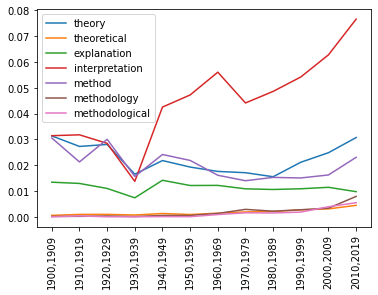

In [27]:
words = ["theory", "theoretical", "explanation", "interpretation", "method", "methodology", "methodological"]
data = []
for decade in decades:
    decade_data = {"decade" : decade}
    decade_data.update(pct_frequency("jstor_articles", "publicationYear", ".between({0})".format(decade), words))
    data.append(decade_data)
data_df = pd.DataFrame(data)
data_df

ax = data_df.plot()
ax.set_xticks(range(len(data_df)))
ax.set_xticklabels(data_df["decade"].tolist(), rotation=90)